## Project Name: Olympics Analysis

- Sports goes into entertainment category as far as viewers are concerned.
- Olympic athletes are considered as benchmarks in regards with their Strength, Agility and Intelligence.

### Project goal:
- To explore a dataset on the modern Summer Olympic Games - Athens data from 1896 to Rio 2016.
- In this project, I investigate on the results and understand trends of Olympics results. 
- Answer some common questions about the Summer Olympics.

### Dataset:
- Dataset have records at an individual Athlete competing in an individual Olympic events. 
- Columns as Name, Age, Medal_Won, Game, Year, and so on.

### Using summer olympics dataset we try to find out following questions answer:



### Phase 1: Data Collection

 ##### We are using two tables which are available at MySQL database:
 - olympics_history table where each row corresponds to an individual athlete competing in an individual Olympic event.
 - olympics_history_noc_regions contains NOC(National Olympic Committee  a 3-letter code) which helps us to add country information and its correspondion region from its NOC code.

In [40]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Phase 2: Data Understanding

In [41]:
# Connecting to MySql Database
import mysql.connector
mydb=mysql.connector.connect(
host="localhost",
user="root",
password="Sangeeta@4820",
use_pure=True)

In [42]:
query = '''SELECT * FROM Olympics.olympics_history'''

In [43]:
olympics_history_df = pd.read_sql_query(query, mydb)

In [44]:
olympics_history_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


Athletics        37361
Gymnastics       25463
Swimming         22596
Shooting         10620
Cycling          10170
                 ...  
Racquets            12
Jeu De Paume        11
Roque                3
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [45]:
query ='''SELECT * FROM Olympics.olympics_history_noc_regions'''

In [46]:
olympics_history_noc_regions_df = pd.read_sql_query(query, mydb)

In [47]:
olympics_history_noc_regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,
3,ALG,Algeria,
4,AND,Andorra,


#### Column names:

In [48]:
query='''
SELECT COLUMN_NAME 
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE TABLE_SCHEMA='Olympics' 
AND TABLE_NAME='olympics_history';
'''

In [49]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [50]:
olympics_histoty_data

,COLUMN_NAME
0,ID
1,Name
2,Sex
3,Age
4,Height
5,Weight
6,Team
7,NOC
8,Games
9,Year


### Observation:

#### olympics_history table

1. Id:
    - Represents unique number for each athlete.
2. Name:
    - Represents name of the athlete.
3. Sex:
    - Represents sex of athlete.
    - M for Male ,F for female
4. Age:
    - Represents age of an athlete 
5. Height:
    - Represents height of an athlete in cm.
    - It has 51402 null values.
6. Weight:
    - Represents Weight of an athlete in kg.
    - It has 54074 null values.
7. Team:
    - Represents for which team an athelete was playing.
8. NOC:
    - Represents National Olympic Committee which is 3-letter code.
9. Games:
    - Represents year and season olympic games was hosted.
10. Year:
    - Represnts for which year olympic games was hosted.
11. Season:
    - reprsents for which season olympic games was hosted.
12. City:
    - Represents host city for respective olympic games.
13. Sport:
    - Represents Sport played by each athlete in olympic games.
14. Event:
    - Represents event name with respect to each game.
15. Medal:
    - Represents  type of medal won by each athlete.
    - It contains gold,silver,bronze medals.
    - NA represnts no medal won by the athlete.
    - There are 222153 null values.

#### olympics_history_noc_regions table
1. NOC:
 - Represents National Olympic Committee which is 3-letter code.
2. region:
  - Represents in which region olympic games was hosted.
3. notes:
 - Represents some additional notes with respect to every region.

#### Null values in each columns:

In [51]:
query='''

WITH column_name_cte AS(
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'olympics_history'
),
count_null_values AS(
SELECT 'id' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE ID ='NA'
UNION 
SELECT 'name' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Name ='NA'
UNION 
SELECT 'sed' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sex ='Na'
UNION 
SELECT 'age' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Age ='Na'
UNION 
SELECT 'height' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Height ='Na'
UNION 
SELECT 'weight' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Weight ='Na'
UNION 
SELECT 'team' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Team ='Na'
UNION 
SELECT 'noc' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE NOC ='Na'
UNION 
SELECT 'games' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Games ='Na'
UNION 
SELECT 'year' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Year ='Na'
UNION 
SELECT 'season' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Season ='Na'
UNION 
SELECT 'city' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE City ='Na'
UNION 
SELECT 'sport' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sport ='Na'
UNION 
SELECT 'event' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Event ='Na'
UNION 
SELECT 'medal' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Medal ='Na'

)
SELECT * FROM count_null_values
'''

In [52]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [53]:
olympics_histoty_data

,col_name,null_values
0,id,0
1,name,0
2,sed,0
3,age,0
4,height,51402
5,weight,54074
6,team,0
7,noc,0
8,games,0
9,year,0


### Phase 3: Data Querying using SQL:

#### Q.1 Find the oldest year and and find out count of sports played in that year ?

In [54]:
query = '''
            SELECT 
                Name AS name,
                Sex AS sex,
                Team AS country,
                Year AS year,
                Season As season,
                Sport AS sport
            FROM 
                Olympics.olympics_history 
            WHERE 
                Year = (SELECT 
                            min(Year)
                        FROM Olympics.olympics_history
                        )
        '''

In [55]:
olympics_data = pd.read_sql_query(query, mydb)

In [56]:
olympics_data

,name,sex,country,year,season,sport
0,Arthur Charles Blake,M,United States,1896,Summer,Athletics
1,Arthur Charles Blake,M,United States,1896,Summer,Athletics
2,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
3,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
4,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
...,...,...,...,...,...,...
212,Thomas Xenakis,M,Greece,1896,Summer,Gymnastics
213,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics
214,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics
215,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Gymnastics'),
  Text(1, 0, 'Athletics'),
  Text(2, 0, 'Shooting'),
  Text(3, 0, 'Cycling'),
  Text(4, 0, 'Tennis'),
  Text(5, 0, 'Swimming'),
  Text(6, 0, 'Weightlifting'),
  Text(7, 0, 'Fencing'),
  Text(8, 0, 'Wrestling')])

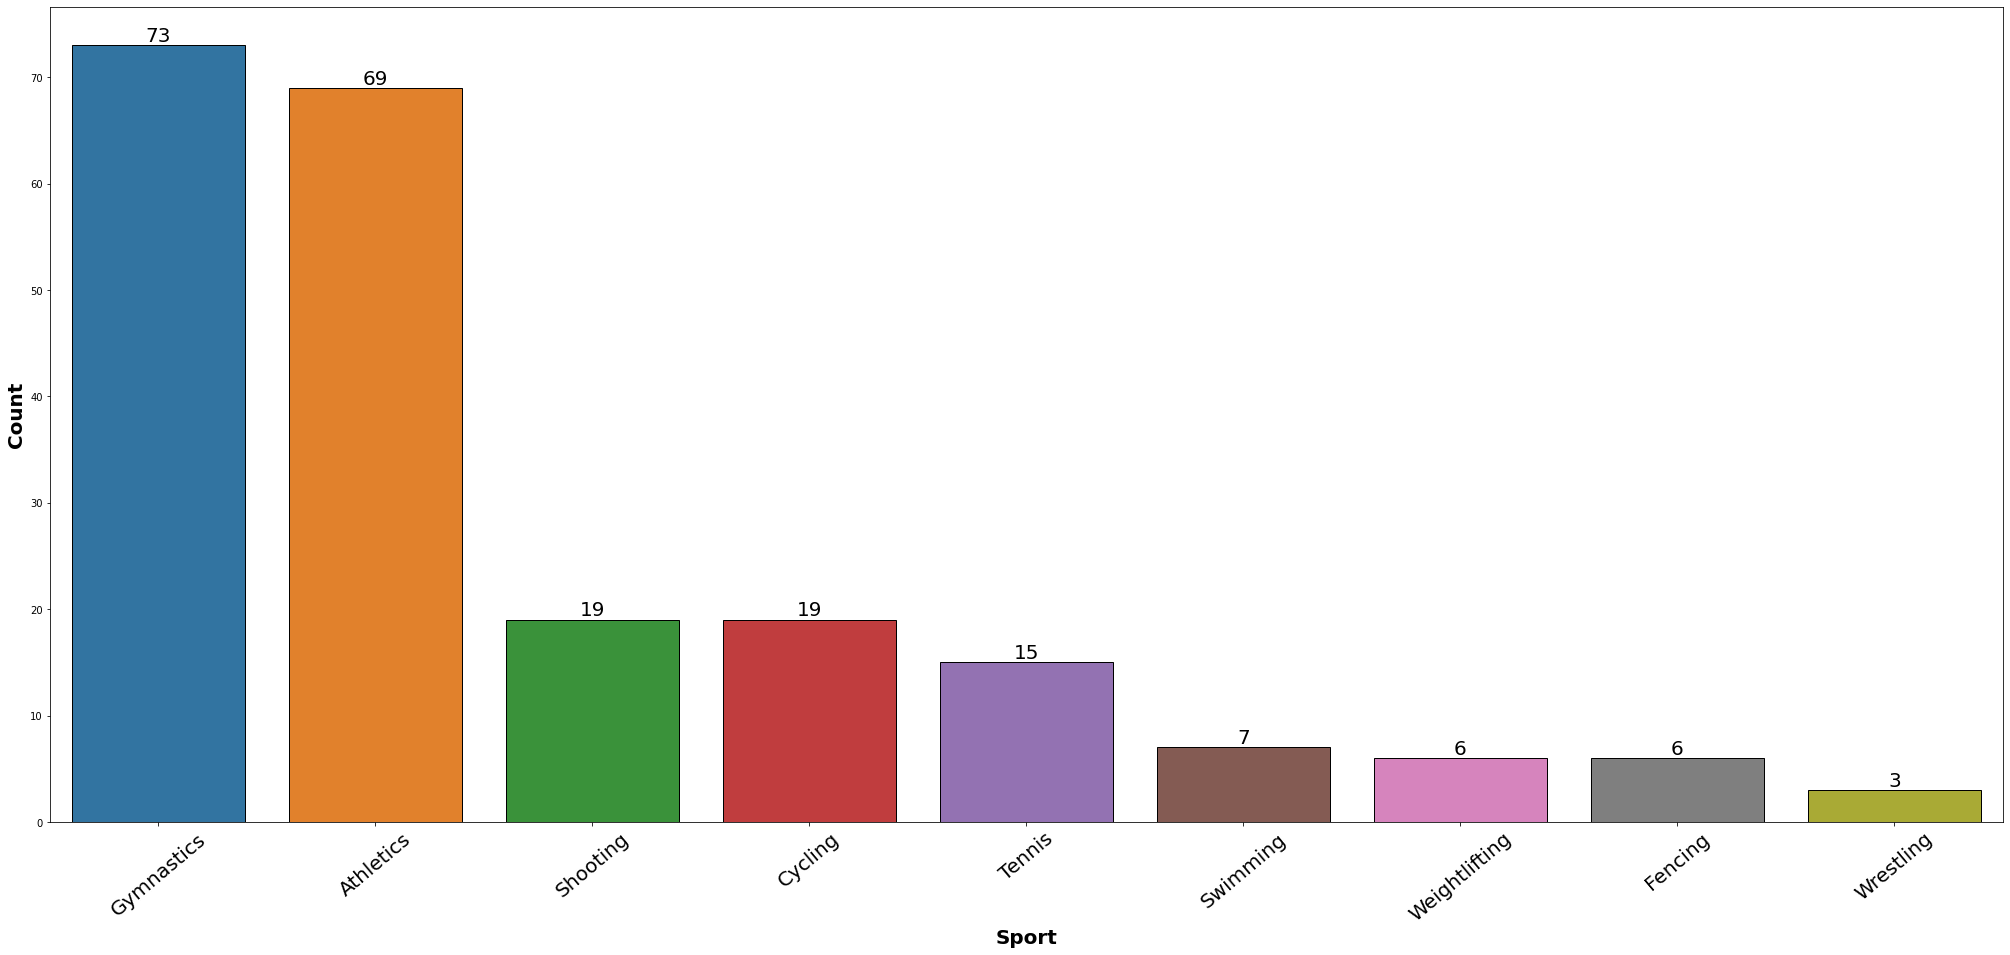

In [59]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x='sport',data=olympics_data,ec="black",order=olympics_data["sport"].value_counts().index)
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Sport", weight="bold", fontsize=20)
plt.xticks(rotation = 40,fontsize=20)

### Observation:
- Found that oldest year is 1896.
- Athletics has highest number of participation in the year 1896


#### Q.2 Find the latest year and and find count of countries played in that year ?

In [60]:
query = '''
            SELECT 
                Name AS name,
                Sex AS sex,
                Team AS country,
                Year AS year,
                Season As season,
                Sport AS sport
            FROM 
                Olympics.olympics_history 
            WHERE 
                Year = (SELECT 
                            max(Year)
                        FROM Olympics.olympics_history
                        )
        '''

In [61]:
olympics_data = pd.read_sql_query(query, mydb)

In [62]:
olympics_data

,name,sex,country,year,season,sport
0,Andreea Aanei,F,Romania,2016,Summer,Weightlifting
1,Nstor Abad Sanjun,M,Spain,2016,Summer,Gymnastics
2,Nstor Abad Sanjun,M,Spain,2016,Summer,Gymnastics
3,Nstor Abad Sanjun,M,Spain,2016,Summer,Gymnastics
4,Nstor Abad Sanjun,M,Spain,2016,Summer,Gymnastics
...,...,...,...,...,...,...
13680,Marc Zwiebler,M,Germany,2016,Summer,Badminton
13681,Viktoriya Viktorovna Zyabkina,F,Kazakhstan,2016,Summer,Athletics
13682,Viktoriya Viktorovna Zyabkina,F,Kazakhstan,2016,Summer,Athletics
13683,Viktoriya Viktorovna Zyabkina,F,Kazakhstan,2016,Summer,Athletics


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Athletics'),
  Text(1, 0, 'Swimming'),
  Text(2, 0, 'Gymnastics'),
  Text(3, 0, 'Cycling'),
  Text(4, 0, 'Shooting'),
  Text(5, 0, 'Rowing'),
  Text(6, 0, 'Football'),
  Text(7, 0, 'Canoeing'),
  Text(8, 0, 'Hockey'),
  Text(9, 0, 'Judo'),
  Text(10, 0, 'Sailing'),
  Text(11, 0, 'Equestrianism'),
  Text(12, 0, 'Handball'),
  Text(13, 0, 'Fencing'),
  Text(14, 0, 'Wrestling'),
  Text(15, 0, 'Rugby Sevens'),
  Text(16, 0, 'Tennis'),
  Text(17, 0, 'Boxing'),
  Text(18, 0, 'Volleyball'),
  Text(19, 0, 'Basketball'),
  Text(20, 0, 'Water Polo'),
  Text(21, 0, 'Weightlifting'),
  Text(22, 0, 'Table Tennis'),
  Text(23, 0, 'Archery'),
  Text(24, 0, 'Diving'),
  Text(25, 0, 'Badminton'),
  Text(26, 0, 'Taekwondo'),
  Text(27, 0, 'Golf'),
  Text(28, 0, 'Synchronized Swimming'),
  Text(29, 0, 'Triathlon'),
  Text(30, 0, 'Rhythmic 

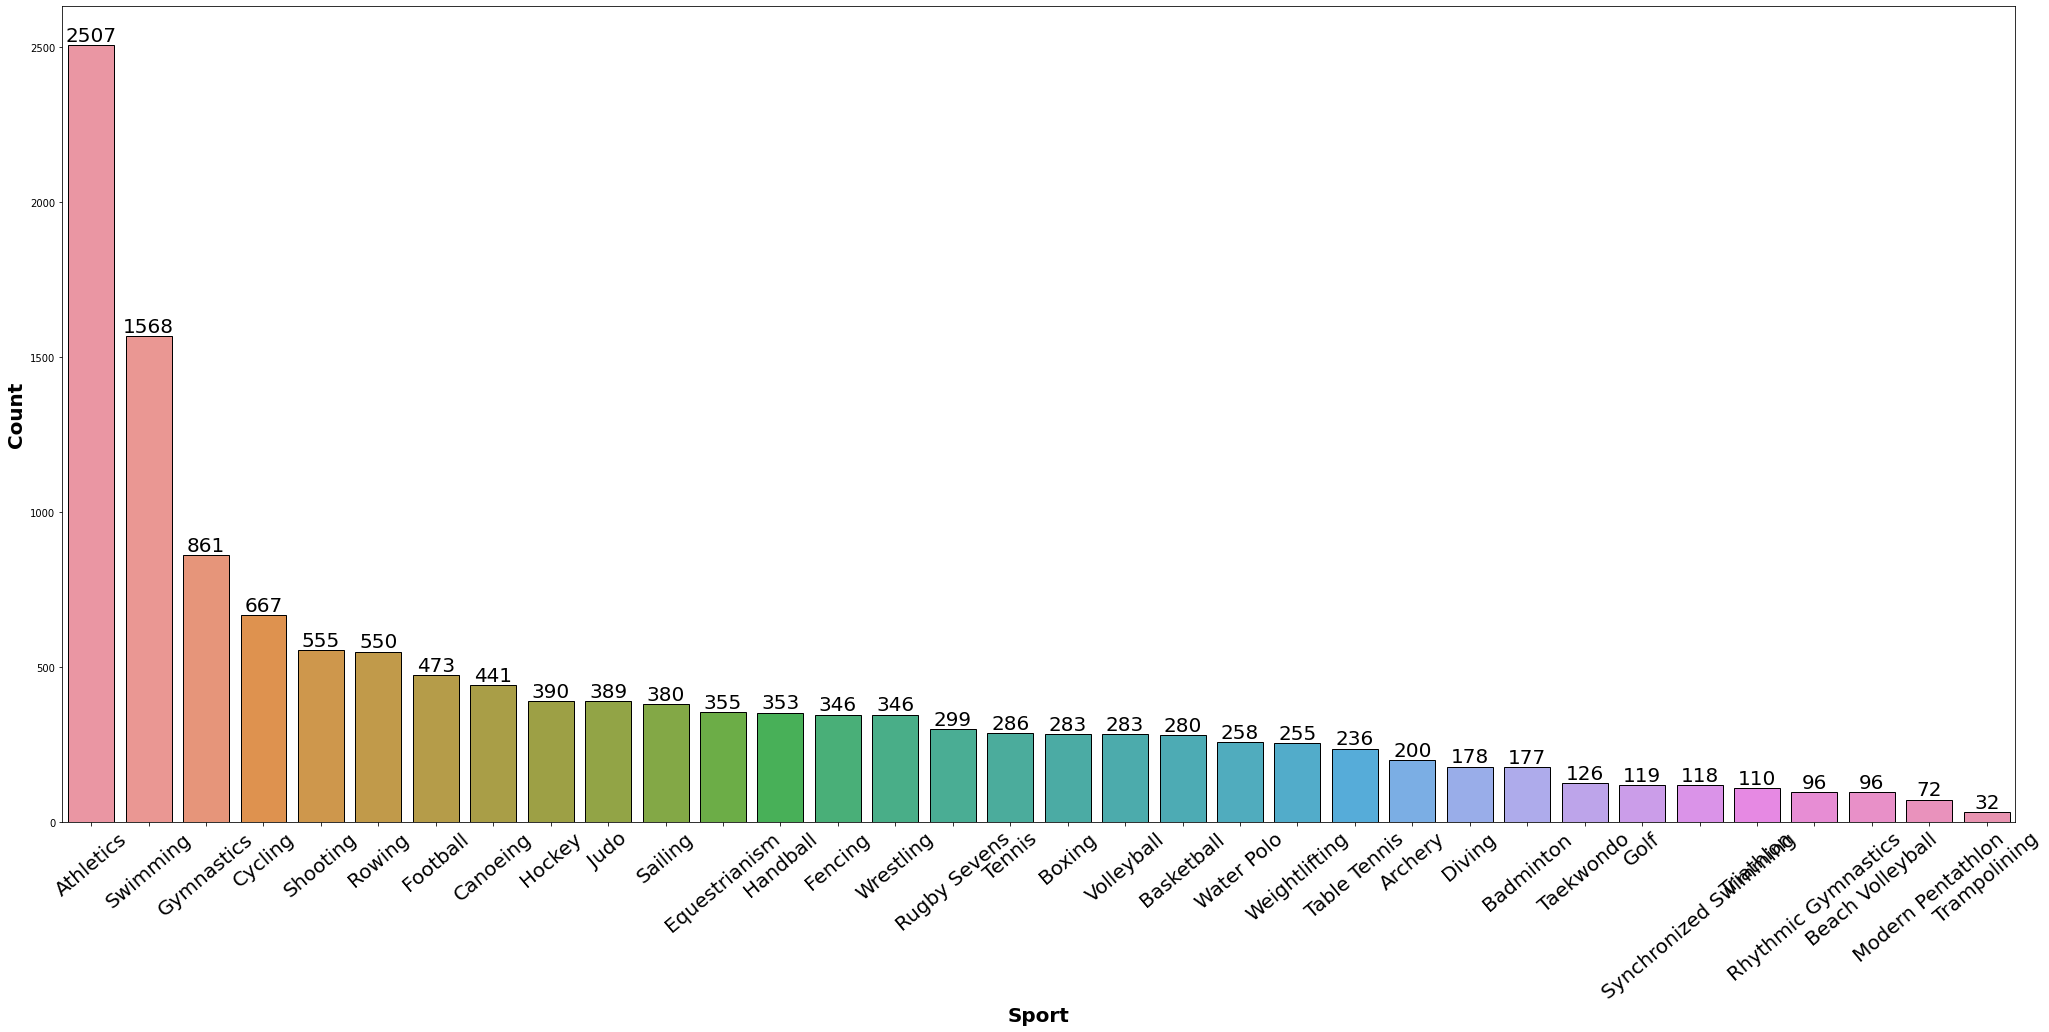

In [64]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x='sport',data=olympics_data,ec="black",order=olympics_data["sport"].value_counts().index)
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Sport", weight="bold", fontsize=20)
plt.xticks(rotation = 40,fontsize=20)

### Observation:
- Found that latest year is 2016.
- Athletics has highest number of participation in the year 2016.


#### Q.3 Which year saw the highest and lowest no of countries participating in olympics?

In [65]:
query = '''
WITH join_tables AS(
SELECT
olympics_history.Games as year,
COUNT(DISTINCT olympics_history_noc_regions.region) AS Country_region
FROM
Olympics.olympics_history
LEFT JOIN Olympics.olympics_history_noc_regions
ON
olympics_history.noc=olympics_history_noc_regions.noc
GROUP BY 1
),

lowest_count AS
(
( SELECT
* FROM join_tables
ORDER BY Country_region ASC LIMIT 1)
UNION ALL
(SELECT
* FROM join_tables
ORDER BY Country_region DESC LIMIT 1)
)
SELECT * FROM lowest_count
        '''

In [66]:
olympics_data = pd.read_sql_query(query, mydb)

In [67]:
olympics_data

,year,Country_region
0,1896 Summer,11
1,2016 Summer,204


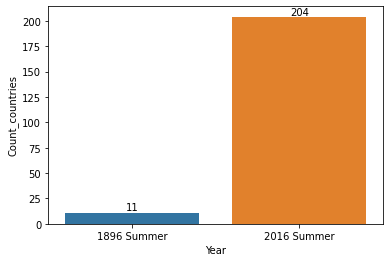

In [68]:
plt.figure(figsize=(6,4))


ax=sns.barplot(x = 'year', y = 'Country_region', data=olympics_data)
plt.xlabel("Year")
plt.ylabel("Count_countries")
ax = ax.bar_label(ax.containers[0])

#### Observation
- 1896 Summer olympics games has lowest count of 11 nations participating in an Olympic games.
- 2016 Summer olympics games has highest count of 204 nations participating in an Olympic games.

#### Q.4 Which nation has participated in all of the olympic games

In [69]:
query = '''
WITH join_table AS
(SELECT
olympics_history.Games AS games,
olympics_history_noc_regions.region AS country_regions
FROM
Olympics.olympics_history
LEFT JOIN Olympics.olympics_history_noc_regions
ON
olympics_history.noc=olympics_history_noc_regions.noc
),
total_games AS
(
SELECT
COUNT(DISTINCT games) AS total_games_olympics
FROM
join_table
),
total_games_countries AS
(
SELECT
country_regions,
COUNT(DISTINCT games) AS total_games_country
FROM
join_table
GROUP BY 1
)
SELECT country_regions,total_games_country fROM total_games_countries
JOIN total_games ON total_games.total_games_olympics=total_games_countries.total_games_country

'''

In [70]:
olympics_data = pd.read_sql_query(query, mydb)

In [71]:
olympics_data

,country_regions,total_games_country
0,Switzerland,51
1,UK,51


#### Observation:
- There are total 51 games played in all olympic games.
- Switzerland and UK are the only countries which participated in all olympic games.


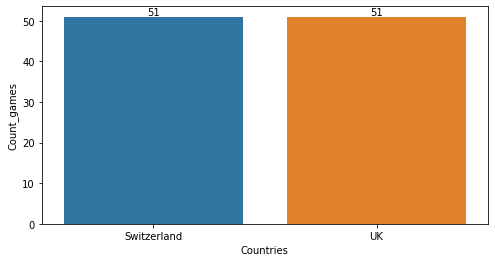

In [72]:
plt.figure(figsize=(8,4))


ax=sns.barplot(x = 'country_regions', y = 'total_games_country', data=olympics_data)
plt.xlabel("Countries")
plt.ylabel("Count_games")
ax = ax.bar_label(ax.containers[0])

#### Q.5 Identify the sport which was played in all summer olympics. -Do afterwards

In [73]:
query ='''
WITH count_summer_olympics AS
(
SELECT
COUNT(DISTINCT Games) AS olympics_year_count
FROM
Olympics.olympics_history
WHERE games LIKE '%Summer%'
),
sports_count_name AS
(
SELECT
Sport,
Games
FROM
Olympics.olympics_history
WHERE games LIKE '%Summer%'
),
total_sports_count AS
(
SELECT
Sport,
COUNT(DISTINCT Games) AS sport_number_count
FROM
Olympics.olympics_history
GROUP BY Sport
)
SELECT * FROM total_sports_count
'''

In [74]:
olympics_data = pd.read_sql_query(query, mydb)

In [75]:
olympics_data

,Sport,sport_number_count
0,Aeronautics,1
1,Alpine Skiing,19
2,Alpinism,3
3,Archery,16
4,Art Competitions,7
...,...,...
61,Tug-Of-War,6
62,Volleyball,14
63,Water Polo,27
64,Weightlifting,26


#### Q.6. Which Sports were just played only once in the olympics.

In [76]:
query='''
WITH olympic_history_cte AS (
SELECT
sport,
Games AS games
FROM 
Olympics.olympics_history
),
count_number_sports AS (
SELECT
sport,
count(DISTINCT games) AS number_of_played_games
FROM olympic_history_cte
GROUP BY 1
)
SELECT
sport,
number_of_played_games
FROM
count_number_sports
WHERE number_of_played_games = 1
ORDER BY 2 asc

'''

In [77]:
olympics_data = pd.read_sql_query(query, mydb)

In [78]:
olympics_data

,sport,number_of_played_games
0,Aeronautics,1
1,Basque Pelota,1
2,Cricket,1
3,Croquet,1
4,Jeu De Paume,1
5,Military Ski Patrol,1
6,Motorboating,1
7,Racquets,1
8,Roque,1
9,Rugby Sevens,1


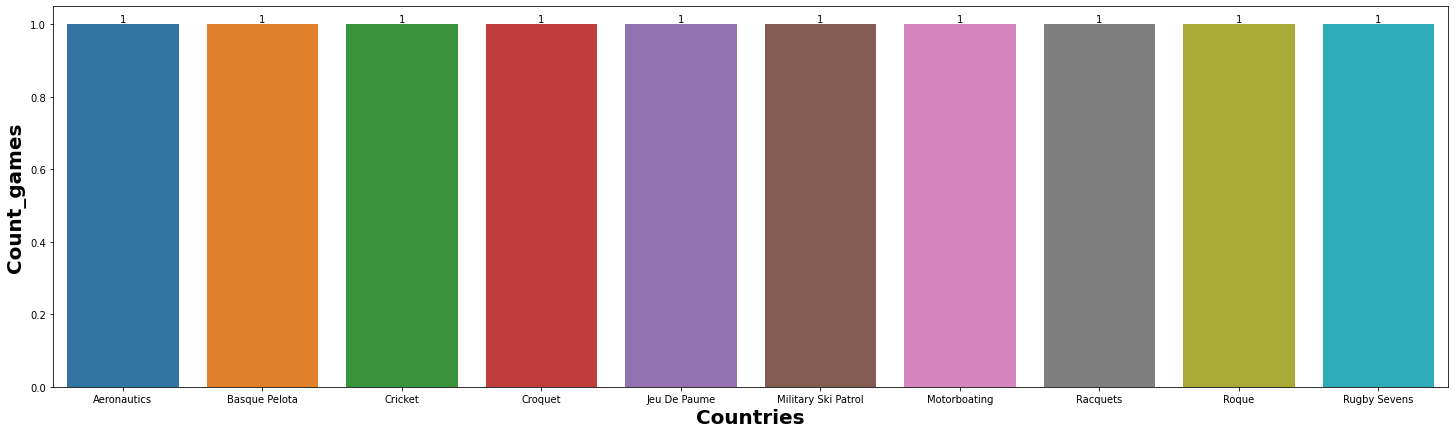

In [79]:
plt.figure(figsize=(25,7))


ax=sns.barplot(x = 'sport', y = 'number_of_played_games', data=olympics_data)
plt.xlabel("Countries",weight="bold", fontsize=20)
plt.ylabel("Count_games",weight="bold", fontsize=20)
ax = ax.bar_label(ax.containers[0])

### Observation:
- Aeronautics,Basque Pelota,Cricket,Croquet,Jeu De Paume,Military Ski Patrol,Motorboating,Racquets,Roque,Rugby Sevens are the games which are only played once in the olympics.
- Number of athletes participated in mentioned games were in less count.Hence sports count was 1 in the dataset. 

#### Q.7  Fetch oldest athletes to win a gold medal

In [86]:
query='''
WITH olympics_cte AS
(
SELECT
name,
sex,
CASE WHEN age = 'NA' then '0' ELSE age END AS age,
team,
Games AS games,
city,
Sport AS sport,
event,
medal
FROM
Olympics.olympics_history
),
ranking as
(
SELECT
* ,
DENSE_RANK() OVER( ORDER BY age DESC) AS age_rnk
FROM
olympics_cte
where MEDAL = 'Gold' 
)
SELECT
*
FROM
ranking
WHERE
age_rnk=1

'''

In [87]:
olympics_data = pd.read_sql_query(query, mydb)

In [88]:
olympics_data

,name,sex,age,team,games,city,sport,event,medal,age_rnk
0,Oscar Gomer Swahn,M,64,Sweden,1912 Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,1
1,Charles Jacobus,M,64,United States,1904 Summer,St. Louis,Roque,Roque Men's Singles,Gold,1


#### Observation:
- Oscar Gomer Swahn won oldest Gold medal in 1912 Summer olympics games for shooting at the age of 64.
- Charles Jacobus won oldest Gold medal in 1904 Summer olympics games for Roque at the age of 64.

#### Q.8 Fetch the top 5 athletes who have won the most medals (gold/silver/bronze). 

In [101]:
query='''
WITH olympics_cte AS
(
SELECT
name,team,medal
FROM Olympics.olympics_history
),
total_medal_cte AS
(
SELECT
name,
team,
COUNT(medal) AS medal_count
FROM olympics_cte
GROUP BY 1,2
ORDER BY medal_count
),

top_five_athletes AS
(
select *,
DENSE_RANK() OVER(ORDER BY medal_count desc) AS top_5_medal_count
FROM total_medal_cte
)
SELECT * FROM top_five_athletes
WHERE top_5_medal_count <=5 ;

'''

In [102]:
olympics_data = pd.read_sql_query(query, mydb)

In [103]:
olympics_data

,name,team,medal_count,top_5_medal_count
0,Robert Tait McKenzie,Canada,58,1
1,Heikki Ilmari Savolainen,Finland,39,2
2,"Joseph ""Josy"""" Stoffel""",Luxembourg,38,3
3,Takashi Ono,Japan,33,4
4,Alfrd (Arnold-) Hajs (Guttmann-),Hungary,32,5
5,Jean Lucien Nicolas Jacoby,Luxembourg,32,5


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Robert Tait McKenzie'),
  Text(1, 0, 'Heikki Ilmari Savolainen'),
  Text(2, 0, 'Joseph "Josy"" Stoffel"'),
  Text(3, 0, 'Takashi Ono'),
  Text(4, 0, 'Alfrd (Arnold-) Hajs (Guttmann-)'),
  Text(5, 0, 'Jean Lucien Nicolas Jacoby')])

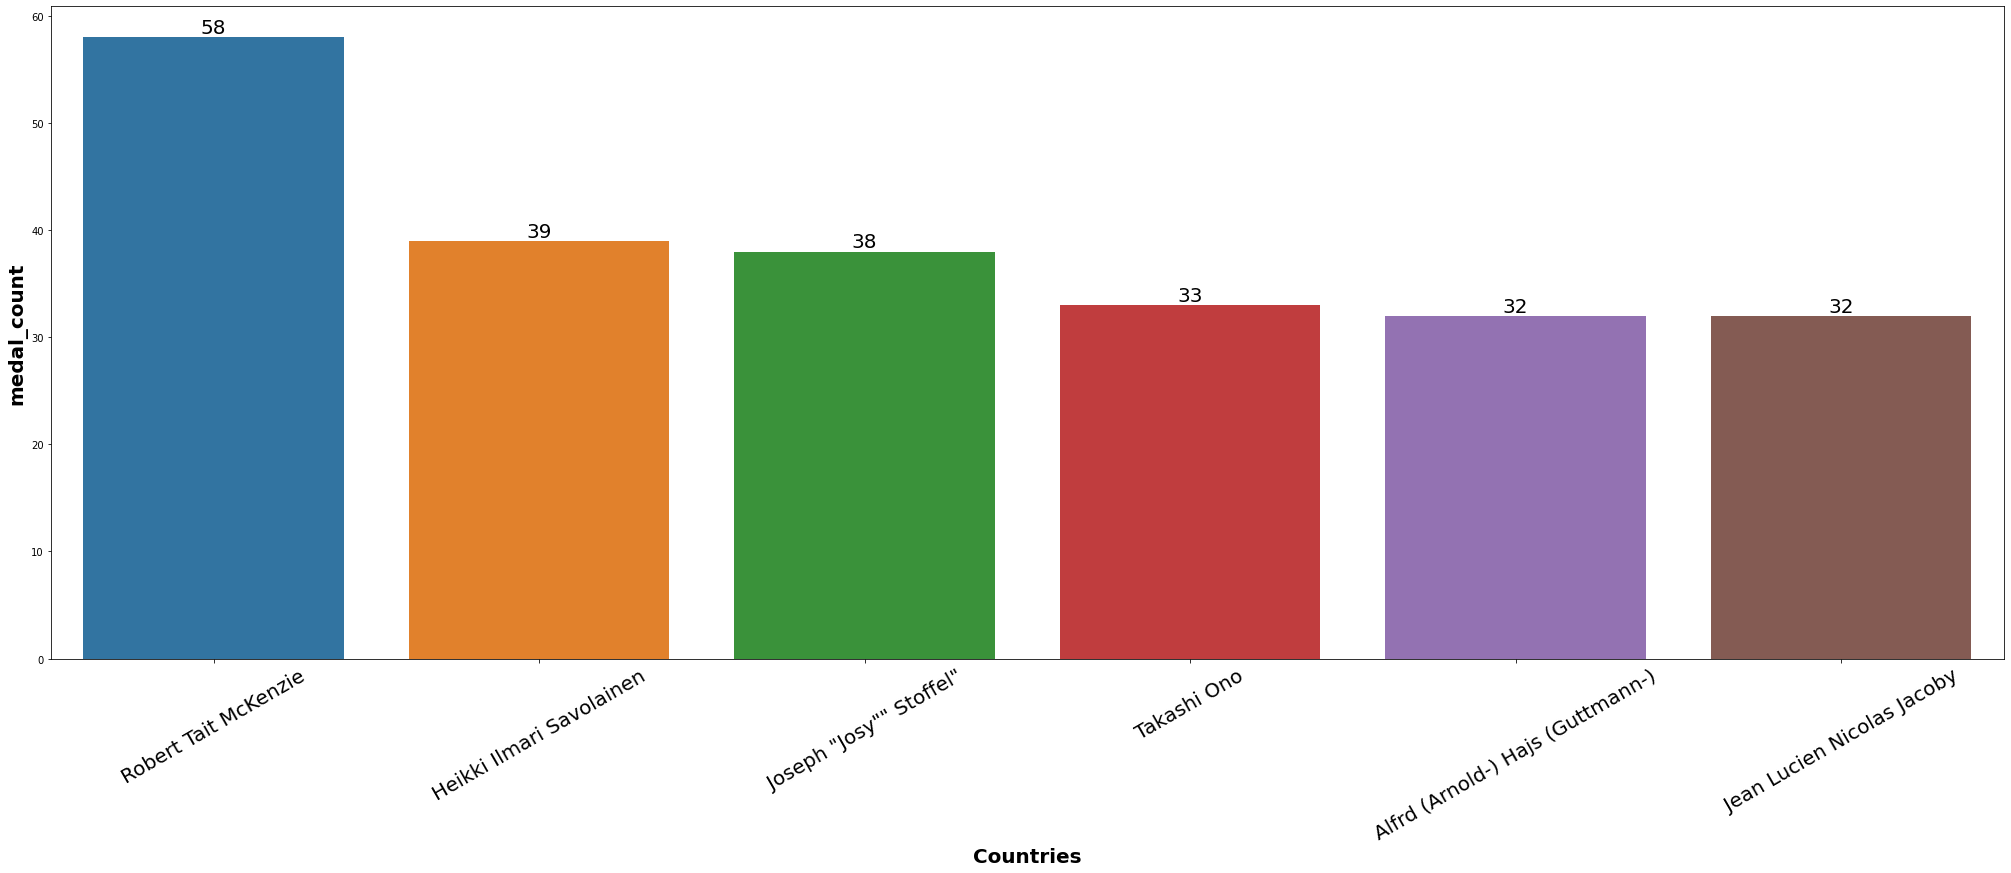

In [125]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'name', y = 'medal_count', data=olympics_data)
plt.xlabel("Countries",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.xticks(rotation = 30,fontsize=20)

#### Observation
- **Robert Tait** have won most of the medals with the count of **58** while **Alferd and Jean** have won least medals with the count of **32**.

#### Q.9 Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [126]:
query='''
WITH join_tables_cte AS(
SELECT
olympics_history_noc_regions.region AS region,
olympics_history.medal AS medal_cnt
FROM
Olympics.olympics_history
LEFT JOIN
Olympics.olympics_history_noc_regions
ON
olympics_history_noc_regions.noc=olympics_history.noc
WHERE medal <> 'NA'
),
medal_count_cte AS(
SELECT
region,
COUNT(medal_cnt) AS medal_count
FROM join_tables_cte
GROUP BY region
),
top_five_countries_cte AS(
SELECT *,
DENSE_RANK() OVER (ORDER BY medal_count DESC) AS rnk
FROM
medal_count_cte
)

SELECT * FROM top_five_countries_cte
WHERE rnk <=5;

'''

In [127]:
olympics_data = pd.read_sql_query(query, mydb)

In [128]:
olympics_data

,region,medal_count,rnk
0,USA,5392,1
1,Russia,3942,2
2,Germany,3719,3
3,UK,1963,4
4,France,1681,5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'France')])

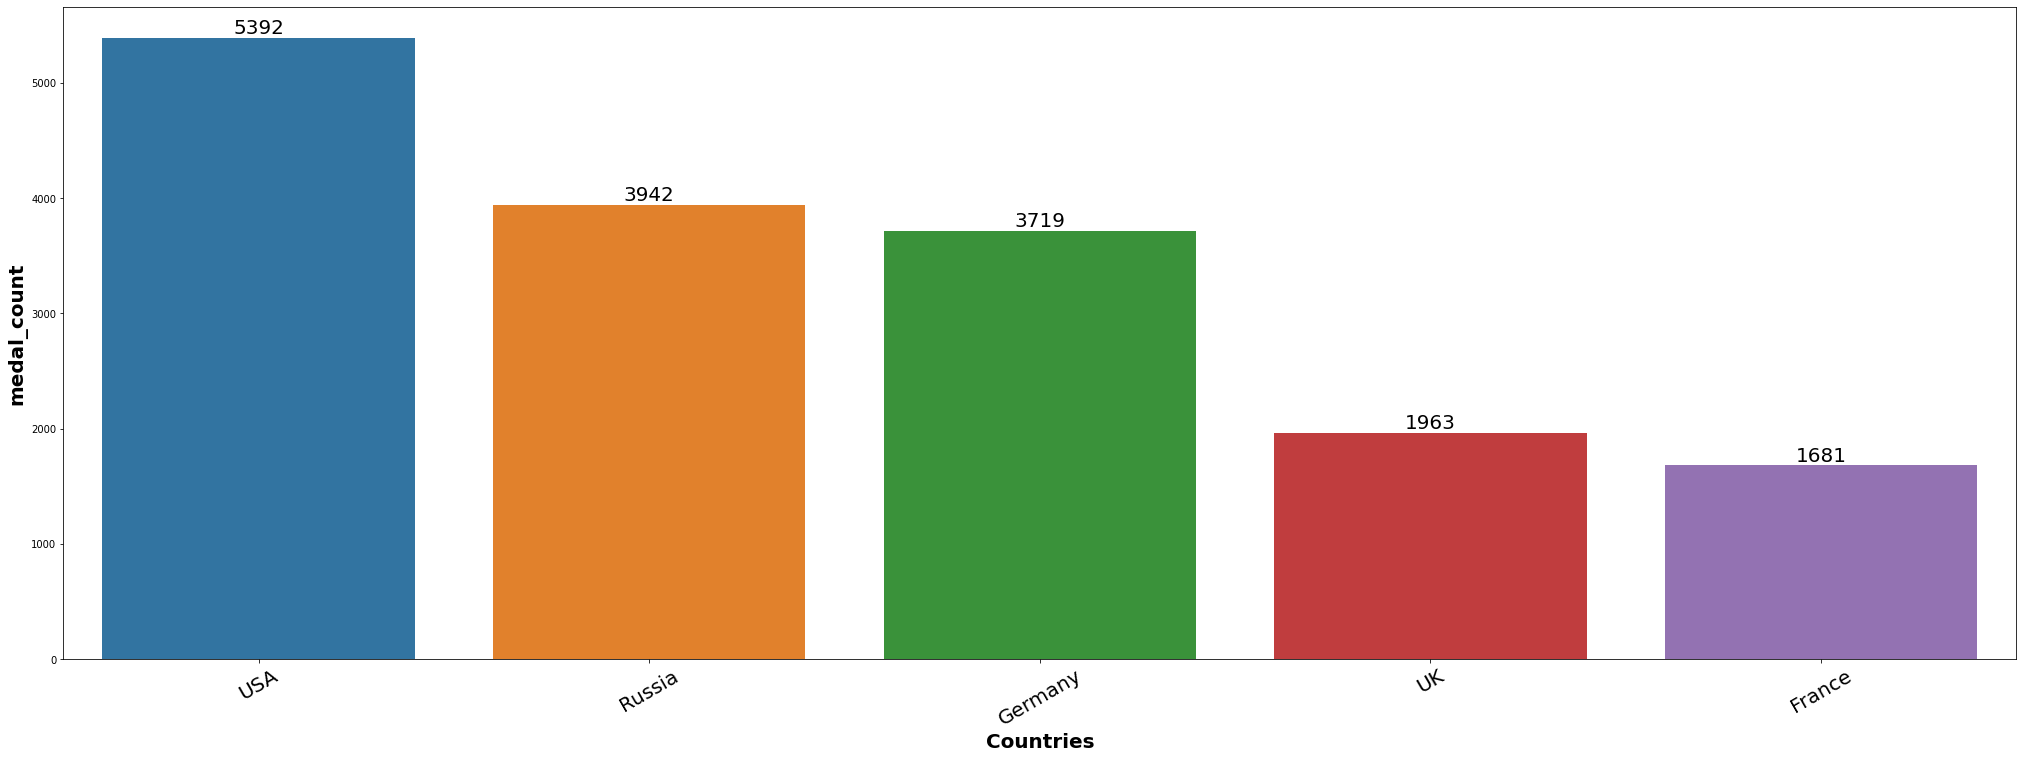

In [129]:
plt.figure(figsize=(35,12))
ax=sns.barplot(x = 'region', y = 'medal_count', data=olympics_data)
plt.xlabel("Countries",fontsize=20,weight="bold")
plt.ylabel("medal_count",fontsize=20,weight="bold")
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.xticks(rotation = 30,fontsize=20)